# Analysis 5
  * Which genres got maximum >= 7 ratings
  * Which genres are most profitable

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('../data/movie_metadata.csv')

In [4]:
data['profit'] = data['gross'] - data['budget']

In [5]:
dt = data[['genres','movie_title','language','title_year','imdb_score','duration','profit']]
dt.head()

,genres,movie_title,language,title_year,imdb_score,duration,profit
0,Action|Adventure|Fantasy|Sci-Fi,Avatar,English,2009.0,7.9,178.0,523505847.0
1,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,English,2007.0,7.1,169.0,9404152.0
2,Action|Adventure|Thriller,Spectre,English,2015.0,6.8,148.0,-44925825.0
3,Action|Thriller,The Dark Knight Rises,English,2012.0,8.5,164.0,198130642.0
4,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,7.1,NaN,NaN


In [6]:
s = dt['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del dt['genres']
df = dt.join(s)

In [7]:
df1 = df[df['imdb_score']>=7]
df1.head()

,movie_title,language,title_year,imdb_score,duration,profit,genres
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Action
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Adventure
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Fantasy
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Sci-Fi
1,Pirates of the Caribbean: At World's End,English,2007.0,7.1,169.0,9404152.0,Action


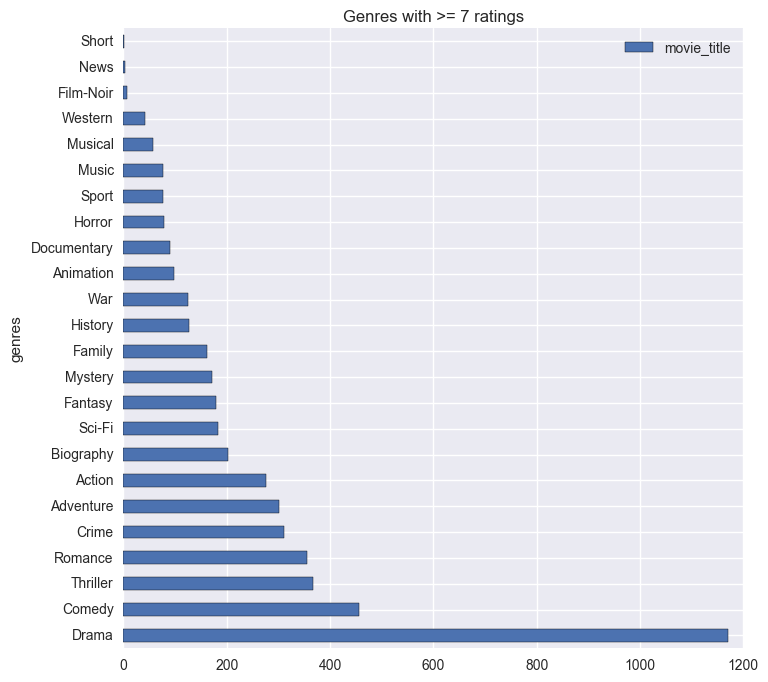

In [8]:
df2 = (pd.DataFrame(df1.groupby('genres').movie_title.nunique())).sort_values('movie_title', ascending=False )
df2[['movie_title']].plot.barh(stacked=True, title = 'Genres with >= 7 ratings', figsize=(8, 8));

In [9]:
df3 = df[['movie_title', 'profit','genres']]
df3.head()

,movie_title,profit,genres
0,Avatar,523505847.0,Action
0,Avatar,523505847.0,Adventure
0,Avatar,523505847.0,Fantasy
0,Avatar,523505847.0,Sci-Fi
1,Pirates of the Caribbean: At World's End,9404152.0,Action


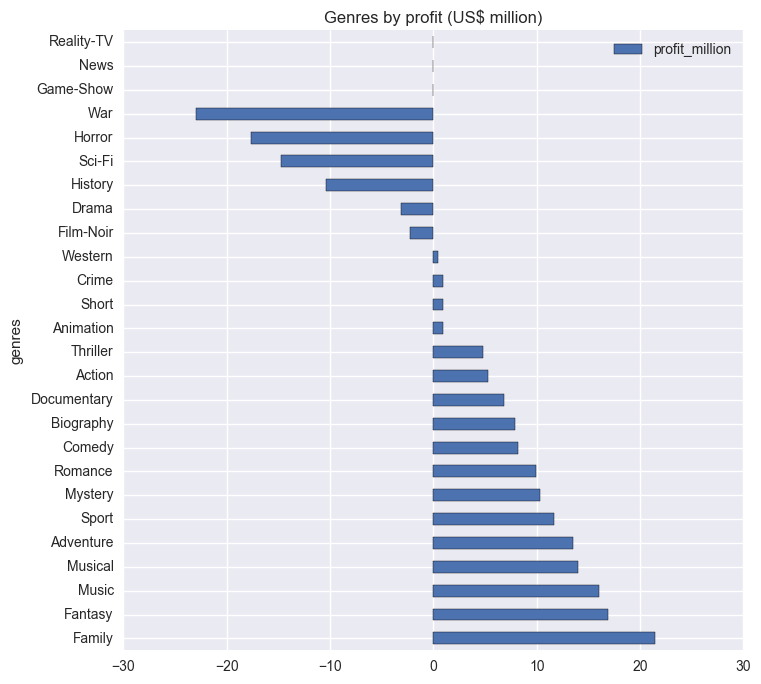

In [10]:
# Checking for NaN
df3.loc[df3['genres'] == 'News']
df4 = df3.groupby(['genres']).mean()
df4['profit_million'] = df4['profit']/1000000
del df4['profit']
df4.sort_values('profit_million', ascending=False, inplace = True )
df4[['profit_million']].plot.barh(stacked=True, title = 'Genres by profit (US$ million)', figsize=(8, 8));